In [1]:
import requests
import urllib.request
def kakao_reverse_geocode(lat, lon):
    addr_list = []
    roadaddr_list =[]
    building_list =[]
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/geo/coord2address.json?&x=' + str(lon) +'&y=' + str(lat) 
    option = '&sort=distance&input_coord=WGS84'
    result = requests.get(url+option, headers={'Authorization': api_key}).json()
    #print(result)
    match_first = result['documents'][0]
    #print(match_first)
    if match_first["road_address"]== None:
        addr_list.append(match_first["address"]["address_name"])
        roadaddr_list.append("no results")
        building_list.append("no results")
        return addr_list,roadaddr_list,building_list
    else:
        addr_list.append(match_first["address"]["address_name"])
        roadaddr_list.append(match_first["road_address"]["address_name"])
        building_list.append(match_first["road_address"]["building_name"])
        return addr_list, roadaddr_list,building_list

In [2]:
def kakao_get_place(place_name):
    place = []
    addr = []
    type_list = []
    lat = []
    lon = []
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?&query='
    query = urllib.parse.quote(place_name)
    for j in range(1,4):
        result = requests.get(url+query+"&page=" + str(j), headers={'Authorization': api_key}).json()
        if len(result['documents']) != 0:
            for i in range(len(result['documents'])):
                #print(result['documents'][i])
                if result['documents'][i]["place_name"] !="":
                    if result['documents'][i]["place_name"] not in place:
                        place.append(result['documents'][i]["place_name"])
                        addr.append(result['documents'][i]["address_name"])
                        type_list.append(result['documents'][i]['category_name'])
                        lat.append(result['documents'][i]['y'])
                        lon.append(result['documents'][i]['x'])
        else:
            place.append("no results")
    return place,type_list,addr,lat,lon

In [3]:
def kakao_get_addr(addr):
    lat = []
    lon = []
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/search/address.json?&query='
    query = urllib.parse.quote(addr)
    result = requests.get(url+query, headers={'Authorization': api_key}).json()
    lat.append(result["documents"][0]["y"])
    lon.append(result["documents"][0]["x"])
    return lat, lon

In [4]:
def kakao_get_place_addr(addr):
    place = []
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?&query='
    query = urllib.parse.quote(addr)
    for j in range(1,4):
        result = requests.get(url+query+"&page=" + str(j), headers={'Authorization': api_key}).json()
        if len(result['documents']) != 0:
            for i in range(len(result['documents'])):
                #print(result['documents'][i])
                if result['documents'][i]["place_name"] !="":
                    if result['documents'][i]["place_name"] not in place:
                        place.append(result['documents'][i]["place_name"])
        else:
            place.append("no results")
    return place

In [5]:
def remove_0(df):
    for i in range(len(df)):
        if df['lat'][i] == 0 or df['lon'][i] == 0:
            df = df.drop(i)
        
    df = df.reset_index(drop=True)
    return df

In [6]:
def get_xdata(df):
    x = df.iloc[:, [1, 2]].values
    return x

In [7]:
def get_cluster_count(cluster):
    cluster_list = []
    for i in cluster:
        if i not in cluster_list:
            cluster_list.append(i)
    return cluster_list

In [12]:
import pymssql
from math import *
import pandas as pd
import numpy as np 

df = pd.read_csv(r"./gps데이터/Log_20210712.txt",sep=',', header = None, names = ['time', 'lat','lon','x','y','z','speed','svm','step_count','acttype'])
df

,time,lat,lon,x,y,z,speed,svm,step_count,acttype
0,2021-07-12 18:02:19,0.000000,0.000000,0.0,0.0,0.0,0.000000,9.306831,0,RUNNING
1,2021-07-12 18:02:24,35.945235,126.682769,0.0,0.0,0.0,0.000000,9.609533,0,RUNNING
2,2021-07-12 18:02:31,35.945243,126.682744,0.0,0.0,0.0,0.262810,9.519007,0,RUNNING
3,2021-07-12 18:02:34,35.945244,126.682742,0.0,0.0,0.0,0.076758,9.542725,0,RUNNING
4,2021-07-12 18:02:39,35.945242,126.682748,0.0,0.0,0.0,0.077460,9.528459,0,RUNNING
...,...,...,...,...,...,...,...,...,...,...
504,2021-07-12 18:46:20,35.944583,126.685746,0.0,0.0,0.0,0.124464,9.557976,143,RUNNING
505,2021-07-12 18:46:25,35.944584,126.685748,0.0,0.0,0.0,0.017291,9.562964,143,RUNNING
506,2021-07-12 18:46:30,35.944579,126.685761,0.0,0.0,0.0,0.196938,9.543591,143,RUNNING
507,2021-07-12 18:46:35,35.944578,126.685751,0.0,0.0,0.0,0.099579,9.598689,143,RUNNING


In [13]:
df = remove_0(df)
x = get_xdata(df)
x

array([[ 35.9452348, 126.6827686],
       [ 35.9452433, 126.6827439],
       [ 35.9452437, 126.6827422],
       ...,
       [ 35.944579 , 126.6857606],
       [ 35.944578 , 126.6857508],
       [ 35.9445788, 126.6857492]])

In [14]:
df

,time,lat,lon,x,y,z,speed,svm,step_count,acttype
0,2021-07-12 18:02:24,35.945235,126.682769,0.0,0.0,0.0,0.000000,9.609533,0,RUNNING
1,2021-07-12 18:02:31,35.945243,126.682744,0.0,0.0,0.0,0.262810,9.519007,0,RUNNING
2,2021-07-12 18:02:34,35.945244,126.682742,0.0,0.0,0.0,0.076758,9.542725,0,RUNNING
3,2021-07-12 18:02:39,35.945242,126.682748,0.0,0.0,0.0,0.077460,9.528459,0,RUNNING
4,2021-07-12 18:02:44,35.945245,126.682741,0.0,0.0,0.0,0.097831,9.531036,0,RUNNING
...,...,...,...,...,...,...,...,...,...,...
501,2021-07-12 18:46:20,35.944583,126.685746,0.0,0.0,0.0,0.124464,9.557976,143,RUNNING
502,2021-07-12 18:46:25,35.944584,126.685748,0.0,0.0,0.0,0.017291,9.562964,143,RUNNING
503,2021-07-12 18:46:30,35.944579,126.685761,0.0,0.0,0.0,0.196938,9.543591,143,RUNNING
504,2021-07-12 18:46:35,35.944578,126.685751,0.0,0.0,0.0,0.099579,9.598689,143,RUNNING


# 데이터 출력

In [15]:
import numpy as np
import folium
from matplotlib import pyplot as plt
import matplotlib as mpl

m = folium.Map(zoom_start = 15, location=[35.945881525000004, 126.683324296048])

for i in range(len(x)):
    folium.Marker(location=[x[i][0], x[i][1]], popup = (i+1)).add_to(m)

m

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

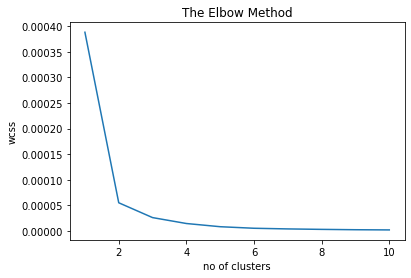

In [17]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [18]:
wcss

[0.00038810776211278906,
 5.509270015964189e-05,
 2.61271701031356e-05,
 1.4584255028814815e-05,
 8.328859494112047e-06,
 5.304280304924259e-06,
 4.0110800882569654e-06,
 3.1299879435147357e-06,
 2.4440730992316516e-06,
 2.0716054761602846e-06]

1


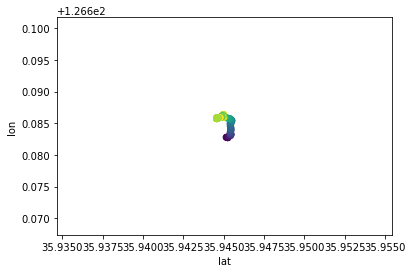

cluster of count  52
2


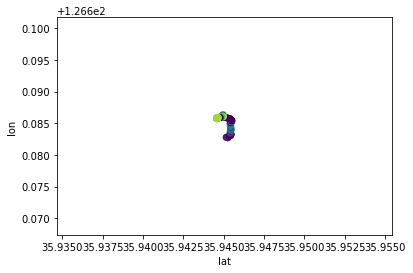

cluster of count  20
3


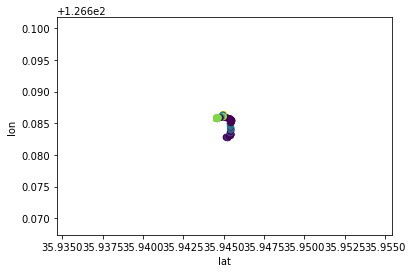

cluster of count  16
4


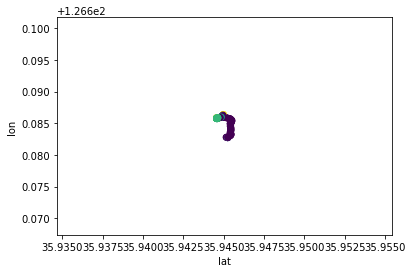

cluster of count  6
5


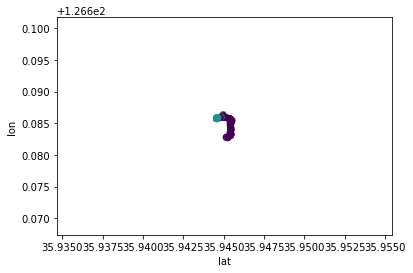

cluster of count  6
6


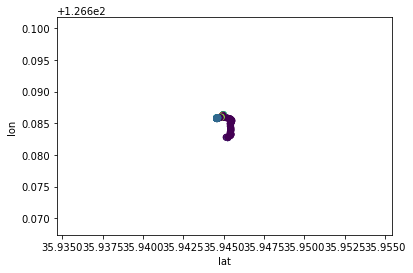

cluster of count  6
7


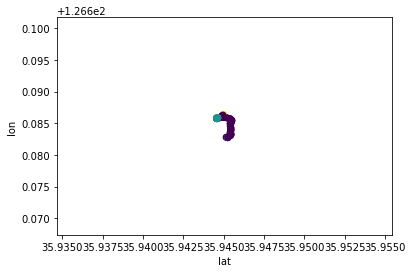

cluster of count  4
8


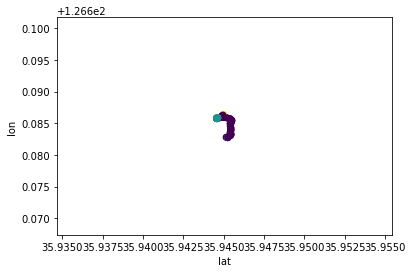

cluster of count  4
9


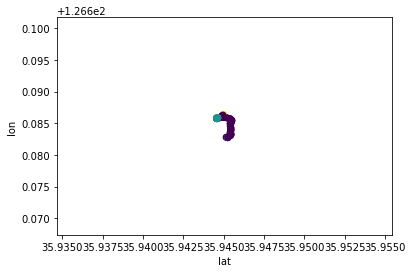

cluster of count  4
10


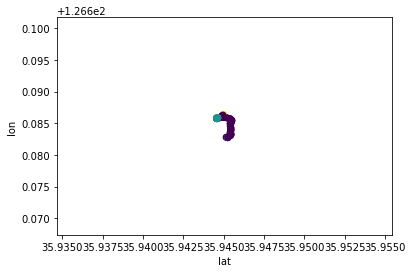

cluster of count  4
11


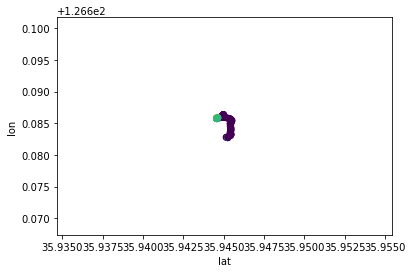

cluster of count  3
12


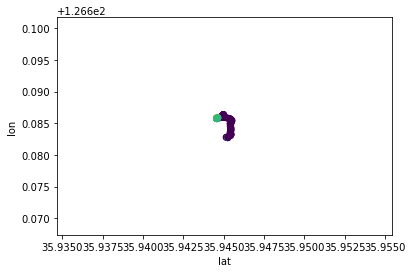

cluster of count  3
13


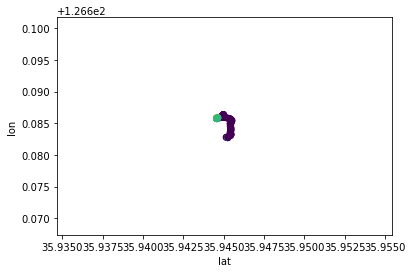

cluster of count  3
14


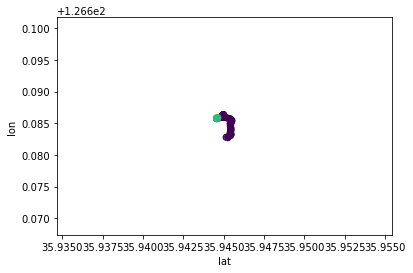

cluster of count  3
15


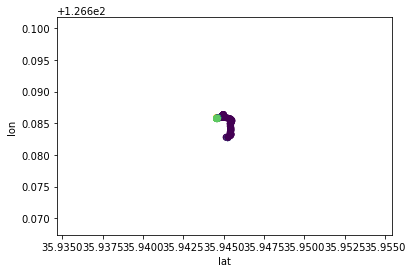

cluster of count  4
16


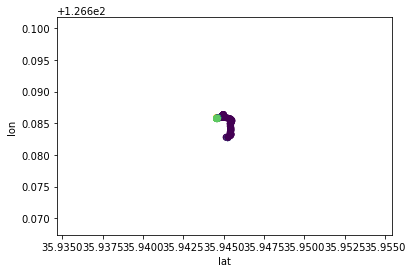

cluster of count  4
17


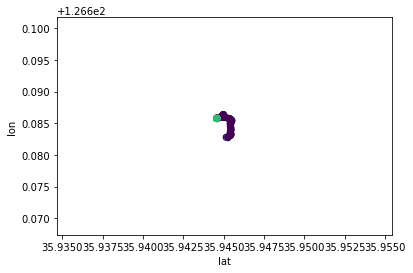

cluster of count  3
18


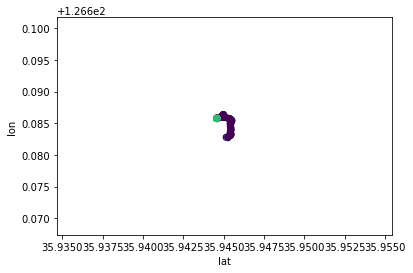

cluster of count  3
19


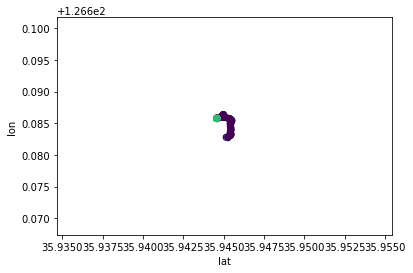

cluster of count  3
20


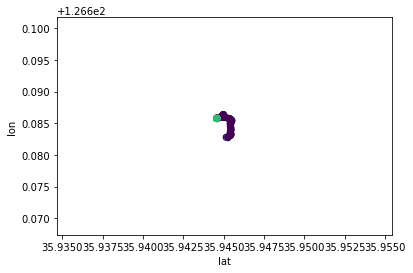

cluster of count  3
21


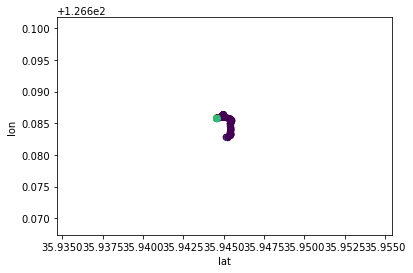

cluster of count  3
22


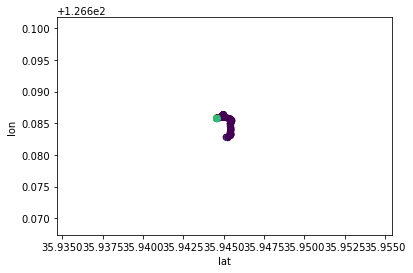

cluster of count  3


KeyboardInterrupt: 

In [254]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

for i in range(1,150):
    db = DBSCAN(eps=wcss[3], min_samples=i, algorithm='ball_tree',metric='haversine').fit(x)
    cluster = db.fit_predict(x)
    label = db.labels_
    cluster_label = get_cluster_count(label)
    plt.scatter(x = df['lat'],y = df['lon'], c=cluster)
    print(i)
    plt.xlabel("lat")
    plt.ylabel("lon")
    plt.show()
    print("cluster of count ",len(cluster_label)-1)

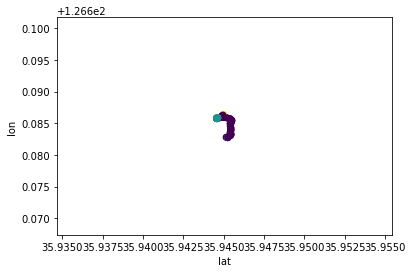

cluster of count  4


In [255]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=wcss[3], min_samples=10,algorithm='ball_tree', metric='haversine').fit(x)
cluster = db.fit_predict(x)
label = db.labels_
cluster_label = get_cluster_count(label)
plt.scatter(x = df['lat'],y = df['lon'], c=cluster)
plt.xlabel("lat")
plt.ylabel("lon")
plt.show()
print("cluster of count ",len(cluster_label)-1)

In [256]:
print(label)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [257]:
def get_cluster_count(cluster):
    cluster_list = []
    for i in cluster:
        if i not in cluster_list:
            cluster_list.append(i)
    return cluster_list

In [639]:
cluster_label = get_cluster_count(label)
print(cluster_label)
cluster_label.remove(-1)
print(cluster_label)  

[0, -1, 1, 2, 3]
[0, 1, 2, 3]


In [913]:
cluster_list = [ [] for i in range(len(cluster_label))]

for i in range(len(cluster_label)):
    for j in range(len(label)):
        if cluster_label[i] == label[j]:
            x_data = x.tolist()
            cluster_list[i].append([str(df['time'][j]), x_data[j][0], x_data[j][1]])

In [914]:
cluster_list

[[['2021-07-12 18:02:24', 35.9452348, 126.6827686],
  ['2021-07-12 18:02:31', 35.945243299999994, 126.6827439],
  ['2021-07-12 18:02:34', 35.945243700000006, 126.6827422],
  ['2021-07-12 18:02:39', 35.9452416, 126.68274840000002],
  ['2021-07-12 18:02:44', 35.9452445, 126.68274109999999],
  ['2021-07-12 18:02:49', 35.9452434, 126.68274309999998],
  ['2021-07-12 18:02:54', 35.9452426, 126.6827482],
  ['2021-07-12 18:02:59', 35.9452421, 126.68274720000001],
  ['2021-07-12 18:03:04', 35.9452425, 126.6827477],
  ['2021-07-12 18:03:09', 35.945245299999996, 126.6827395],
  ['2021-07-12 18:03:14', 35.9452427, 126.68275220000001],
  ['2021-07-12 18:03:19', 35.945242, 126.6827514],
  ['2021-07-12 18:03:24', 35.945241700000004, 126.6827515],
  ['2021-07-12 18:03:29', 35.945242799999995, 126.682745],
  ['2021-07-12 18:03:34', 35.9452436, 126.68274309999998],
  ['2021-07-12 18:03:39', 35.945243, 126.68276000000002],
  ['2021-07-12 18:03:44', 35.9452402, 126.68275890000001],
  ['2021-07-12 18:03:49

In [915]:
not_5sec = []
not_5sec1 = []
cnt = 0
cnt1 = 0
for i in range(len(cluster_list)): # 4
    cnt = 0
    cnt1 =0
    for j in range(len(cluster_list[i])): #
        if j == len(cluster_list[i])-1:
            pass
        else:
            date_time = datetime.strptime(cluster_list[i][j][0], '%Y-%m-%d %H:%M:%S')
            date_time1 = datetime.strptime(cluster_list[i][j+1][0], '%Y-%m-%d %H:%M:%S')
            date_diff = date_time1 - date_time
            print("초 차이 :", date_diff.seconds)
            if date_diff.seconds == 5:
                cnt += 1
                cnt1 =0
                if cnt == 1:
                    not_5sec1.append(cluster_list[i][j][0])
                time1 = cluster_list[i][j][0]
                print(time1)
            else:
                cnt1 += 1
                if cnt1 ==1 and j!=0:
                    not_5sec.append(cluster_list[i][j][0])
                    break

초 차이 : 7
초 차이 : 3
초 차이 : 5
2021-07-12 18:02:34
초 차이 : 5
2021-07-12 18:02:39
초 차이 : 5
2021-07-12 18:02:44
초 차이 : 5
2021-07-12 18:02:49
초 차이 : 5
2021-07-12 18:02:54
초 차이 : 5
2021-07-12 18:02:59
초 차이 : 5
2021-07-12 18:03:04
초 차이 : 5
2021-07-12 18:03:09
초 차이 : 5
2021-07-12 18:03:14
초 차이 : 5
2021-07-12 18:03:19
초 차이 : 5
2021-07-12 18:03:24
초 차이 : 5
2021-07-12 18:03:29
초 차이 : 5
2021-07-12 18:03:34
초 차이 : 5
2021-07-12 18:03:39
초 차이 : 5
2021-07-12 18:03:44
초 차이 : 5
2021-07-12 18:03:49
초 차이 : 5
2021-07-12 18:03:54
초 차이 : 15
초 차이 : 5
2021-07-12 18:10:24
초 차이 : 5
2021-07-12 18:10:29
초 차이 : 5
2021-07-12 18:10:34
초 차이 : 5
2021-07-12 18:10:39
초 차이 : 5
2021-07-12 18:10:44
초 차이 : 5
2021-07-12 18:10:49
초 차이 : 5
2021-07-12 18:10:54
초 차이 : 5
2021-07-12 18:10:59
초 차이 : 5
2021-07-12 18:11:04
초 차이 : 5
2021-07-12 18:11:09
초 차이 : 5
2021-07-12 18:11:14
초 차이 : 5
2021-07-12 18:11:19
초 차이 : 5
2021-07-12 18:11:24
초 차이 : 5
2021-07-12 18:11:29
초 차이 : 5
2021-07-12 18:11:34
초 차이 : 5
2021-07-12 18:11:39
초 차이 : 5
2021-0

In [916]:
cluster_list

[[['2021-07-12 18:02:24', 35.9452348, 126.6827686],
  ['2021-07-12 18:02:31', 35.945243299999994, 126.6827439],
  ['2021-07-12 18:02:34', 35.945243700000006, 126.6827422],
  ['2021-07-12 18:02:39', 35.9452416, 126.68274840000002],
  ['2021-07-12 18:02:44', 35.9452445, 126.68274109999999],
  ['2021-07-12 18:02:49', 35.9452434, 126.68274309999998],
  ['2021-07-12 18:02:54', 35.9452426, 126.6827482],
  ['2021-07-12 18:02:59', 35.9452421, 126.68274720000001],
  ['2021-07-12 18:03:04', 35.9452425, 126.6827477],
  ['2021-07-12 18:03:09', 35.945245299999996, 126.6827395],
  ['2021-07-12 18:03:14', 35.9452427, 126.68275220000001],
  ['2021-07-12 18:03:19', 35.945242, 126.6827514],
  ['2021-07-12 18:03:24', 35.945241700000004, 126.6827515],
  ['2021-07-12 18:03:29', 35.945242799999995, 126.682745],
  ['2021-07-12 18:03:34', 35.9452436, 126.68274309999998],
  ['2021-07-12 18:03:39', 35.945243, 126.68276000000002],
  ['2021-07-12 18:03:44', 35.9452402, 126.68275890000001],
  ['2021-07-12 18:03:49

In [917]:
not_5sec1

['2021-07-12 18:02:34',
 '2021-07-12 18:10:24',
 '2021-07-12 18:37:05',
 '2021-07-12 18:39:55']

In [918]:
not_5sec

['2021-07-12 18:03:59', '2021-07-12 18:35:19', '2021-07-12 18:37:35']

In [919]:
cluster_list[i][0]

['2021-07-12 18:39:55', 35.9449639, 126.6863149]

In [920]:
index_list =[]
for i in range(len(not_5sec1)):
    for j in range(len(cluster_list[i])):
        date_time = datetime.strptime(not_5sec1[i], '%Y-%m-%d %H:%M:%S')
        date_time1 = datetime.strptime(cluster_list[i][j][0], '%Y-%m-%d %H:%M:%S')
        if date_time > date_time1:
            index_list.append([i,j])

In [921]:
index_list

[[0, 0], [0, 1]]

In [922]:
cnt = 0
for i in range(len(index_list)):
    if cnt == 0:
        cluster_list[index_list[i][0]].pop(index_list[i][1])
        print('1',cluster_list[0])
        cnt +=1
    else:
        cluster_list[index_list[i][0]].pop(index_list[i][1]-1)
        print('2',cluster_list[0])

1 [['2021-07-12 18:02:31', 35.945243299999994, 126.6827439], ['2021-07-12 18:02:34', 35.945243700000006, 126.6827422], ['2021-07-12 18:02:39', 35.9452416, 126.68274840000002], ['2021-07-12 18:02:44', 35.9452445, 126.68274109999999], ['2021-07-12 18:02:49', 35.9452434, 126.68274309999998], ['2021-07-12 18:02:54', 35.9452426, 126.6827482], ['2021-07-12 18:02:59', 35.9452421, 126.68274720000001], ['2021-07-12 18:03:04', 35.9452425, 126.6827477], ['2021-07-12 18:03:09', 35.945245299999996, 126.6827395], ['2021-07-12 18:03:14', 35.9452427, 126.68275220000001], ['2021-07-12 18:03:19', 35.945242, 126.6827514], ['2021-07-12 18:03:24', 35.945241700000004, 126.6827515], ['2021-07-12 18:03:29', 35.945242799999995, 126.682745], ['2021-07-12 18:03:34', 35.9452436, 126.68274309999998], ['2021-07-12 18:03:39', 35.945243, 126.68276000000002], ['2021-07-12 18:03:44', 35.9452402, 126.68275890000001], ['2021-07-12 18:03:49', 35.9452446, 126.68274779999999], ['2021-07-12 18:03:54', 35.9452446, 126.6827414

In [923]:
cluster_list

[[['2021-07-12 18:02:34', 35.945243700000006, 126.6827422],
  ['2021-07-12 18:02:39', 35.9452416, 126.68274840000002],
  ['2021-07-12 18:02:44', 35.9452445, 126.68274109999999],
  ['2021-07-12 18:02:49', 35.9452434, 126.68274309999998],
  ['2021-07-12 18:02:54', 35.9452426, 126.6827482],
  ['2021-07-12 18:02:59', 35.9452421, 126.68274720000001],
  ['2021-07-12 18:03:04', 35.9452425, 126.6827477],
  ['2021-07-12 18:03:09', 35.945245299999996, 126.6827395],
  ['2021-07-12 18:03:14', 35.9452427, 126.68275220000001],
  ['2021-07-12 18:03:19', 35.945242, 126.6827514],
  ['2021-07-12 18:03:24', 35.945241700000004, 126.6827515],
  ['2021-07-12 18:03:29', 35.945242799999995, 126.682745],
  ['2021-07-12 18:03:34', 35.9452436, 126.68274309999998],
  ['2021-07-12 18:03:39', 35.945243, 126.68276000000002],
  ['2021-07-12 18:03:44', 35.9452402, 126.68275890000001],
  ['2021-07-12 18:03:49', 35.9452446, 126.68274779999999],
  ['2021-07-12 18:03:54', 35.9452446, 126.68274140000001],
  ['2021-07-12 18

In [924]:
index_list =[]
for i in range(len(not_5sec)):
    for j in range(len(cluster_list[i])):
        date_time = datetime.strptime(not_5sec[i], '%Y-%m-%d %H:%M:%S')
        date_time1 = datetime.strptime(cluster_list[i][j][0], '%Y-%m-%d %H:%M:%S')
        if date_time <  date_time1:
            index_list.append([i,j])

In [925]:
index_list

[[0, 18],
 [0, 19],
 [1, 300],
 [1, 301],
 [1, 302],
 [1, 303],
 [1, 304],
 [1, 305],
 [1, 306],
 [1, 307],
 [1, 308],
 [1, 309],
 [1, 310],
 [1, 311],
 [1, 312],
 [1, 313],
 [1, 314],
 [1, 315],
 [1, 316],
 [1, 317],
 [1, 318],
 [1, 319],
 [1, 320],
 [1, 321],
 [1, 322],
 [1, 323],
 [1, 324],
 [1, 325],
 [1, 326],
 [1, 327],
 [1, 328],
 [1, 329],
 [1, 330],
 [1, 331],
 [1, 332],
 [1, 333],
 [1, 334],
 [1, 335],
 [1, 336],
 [1, 337],
 [1, 338],
 [1, 339],
 [1, 340],
 [1, 341],
 [1, 342],
 [1, 343],
 [1, 344],
 [1, 345],
 [1, 346],
 [1, 347],
 [1, 348],
 [2, 7],
 [2, 8],
 [2, 9],
 [2, 10],
 [2, 11],
 [2, 12],
 [2, 13],
 [2, 14],
 [2, 15],
 [2, 16],
 [2, 17],
 [2, 18],
 [2, 19],
 [2, 20],
 [2, 21],
 [2, 22],
 [2, 23],
 [2, 24],
 [2, 25],
 [2, 26]]

In [926]:
cnt = 0
for i in range(len(index_list)):
    if index_list[i][0]!=0:
        cnt = 0
    if index_list[i][0] ==0  and cnt == 0:
        cluster_list[index_list[i][0]].pop(index_list[i][1])
        cnt +=1
    elif cnt >=1:
        cluster_list[index_list[i][0]].pop(index_list[i][1]-1)

In [927]:
cluster_list

[[['2021-07-12 18:02:34', 35.945243700000006, 126.6827422],
  ['2021-07-12 18:02:39', 35.9452416, 126.68274840000002],
  ['2021-07-12 18:02:44', 35.9452445, 126.68274109999999],
  ['2021-07-12 18:02:49', 35.9452434, 126.68274309999998],
  ['2021-07-12 18:02:54', 35.9452426, 126.6827482],
  ['2021-07-12 18:02:59', 35.9452421, 126.68274720000001],
  ['2021-07-12 18:03:04', 35.9452425, 126.6827477],
  ['2021-07-12 18:03:09', 35.945245299999996, 126.6827395],
  ['2021-07-12 18:03:14', 35.9452427, 126.68275220000001],
  ['2021-07-12 18:03:19', 35.945242, 126.6827514],
  ['2021-07-12 18:03:24', 35.945241700000004, 126.6827515],
  ['2021-07-12 18:03:29', 35.945242799999995, 126.682745],
  ['2021-07-12 18:03:34', 35.9452436, 126.68274309999998],
  ['2021-07-12 18:03:39', 35.945243, 126.68276000000002],
  ['2021-07-12 18:03:44', 35.9452402, 126.68275890000001],
  ['2021-07-12 18:03:49', 35.9452446, 126.68274779999999],
  ['2021-07-12 18:03:54', 35.9452446, 126.68274140000001],
  ['2021-07-12 18

In [277]:
from datetime import datetime

date_time = datetime.strptime(cluster_list[0][0][0], '%Y-%m-%d %H:%M:%S')
print(date_time)
date_time1 = datetime.strptime(cluster_list[0][1][0], '%Y-%m-%d %H:%M:%S')
print(date_time1)

date_diff = date_time1 - date_time
print("초 차이 :", date_diff.seconds)

2021-07-12 18:02:24
2021-07-12 18:02:31
초 차이 : 7


In [270]:
date_diff = cluster_list[0][1][0] - cluster_list[0][0][0]
print("차이 :", date_diff, ", Type :", type(date_diff))	# 차이 : 15 days, 21:51:33.170644 , Type : <class 'datetime.timedelta'>

print("일 수 차이 :", date_diff.days)	# 일 수 차이 : 15
print("마이크로초 차이 :", date_diff.microseconds)	# 마이크로초 차이 : 170644
print("초 차이 :", date_diff.seconds)	# 초 차이 : 78693

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [261]:
place_list = []
for k in range(len(cluster_list)):
    for i in range(len(cluster_list[k])):
        addr, roadaddr,building = kakao_reverse_geocode(cluster_list[k][i][1],cluster_list[k][i][2])
        for j in addr:
            place = kakao_get_place(j)
            if place[0] == "no results":
                place = building
            print(i+1, "->" ,j)
            #print(place)
            place_list.append(place)

1 -> 전북 군산시 미룡동 290-2
2 -> 전북 군산시 미룡동 290-2
3 -> 전북 군산시 미룡동 290-2
4 -> 전북 군산시 미룡동 290-2
5 -> 전북 군산시 미룡동 290-2
6 -> 전북 군산시 미룡동 290-2


KeyboardInterrupt: 

# 클러스터 중심점

In [262]:
cluster_center = []
for i in range(len(cluster_list)):
    lat_sum = 0
    lon_sum = 0
    for j in range(len(cluster_list[i])):
        lat_sum += cluster_list[i][j][1]
        lon_sum += cluster_list[i][j][2]
    cluster_center.append([lat_sum / len(cluster_list[i]) , lon_sum / len(cluster_list[i])])

In [263]:
for i in range(len(cluster_center)):
    print(i+1, "->", cluster_center[i])

1 -> [35.94524117727274, 126.68275125000001]
2 -> [35.94457626762188, 126.68576843352474]
3 -> [35.9445680037037, 126.68584462592598]
4 -> [35.944969660000005, 126.68634893000001]


In [264]:
cluster_center

[[35.94524117727274, 126.68275125000001],
 [35.94457626762188, 126.68576843352474],
 [35.9445680037037, 126.68584462592598],
 [35.944969660000005, 126.68634893000001]]

In [265]:
for i in range(len(cluster_center)):
    addr, roadaddr,building = kakao_reverse_geocode(cluster_center[i][0],cluster_center[i][1])
    for j in addr:
        place = kakao_get_place(j)
        if place[0] == "no results":
            place = building
        print(i+1, "->" ,j)
        print(place)

1 -> 전북 군산시 미룡동 290-2
(['군산대학교', '전북은행 군산대지점', 'GS25 군산대본점', 'CU 군산대도서관점', 'CU 군산대학생회관점', '군산대학교 황룡도서관', '군산대학교 대학본부', '군산대학교 학생생활관 관리동', '군산대학교 제2학생회관', '군산대학교 박물관', '군산대학교 디지털정보관', '동원문고', '한울미디어', 'IBK기업은행365 군산대학교출장소', '더큰도시락 군산대점', '군산대학교 황룡문화원', '베토벤안경원', '군산 청년해외취업지원센터', '군산대학교 산업대학원', '군산대학교 종합교육관', '군산대학교 문무관', '사회관', '군산대학교 중앙도서관', '군산대학교 음악관', '군산대학교 평생교육원제2동', '군산대생협그라찌에', '군산대학교정류소', '황룡쉼터', '체험과여행사업단', '군산대학교 간호학과', '군산시 귀어귀촌지원센터', '군산대학교 누리관', '군산대학교 진리관', '군산 대학교 테니스장1', '군산대학교 자연과학대학4호관', '카페드림 군산대학교중앙도서관점', '군산대학교 교육대학원', '군산대학교 인문대학사회과학대학', '군산대학교 남문', '군산대학교 자연과학대학1호관', '군산대학교 농구장2', '군산대학교 자연과학대학 3호관', '전북은행365코너 군산대지점', '전북은행ATM 군산대지점', '군산대학교 매화관'], ['교육,학문 > 학교 > 대학교', '금융,보험 > 금융서비스 > 은행 > 전북은행', '가정,생활 > 편의점 > GS25', '가정,생활 > 편의점 > CU', '가정,생활 > 편의점 > CU', '교육,학문 > 학습시설 > 도서관', '교육,학문 > 학교부속시설', '교육,학문 > 학교부속시설', '교육,학문 > 학교부속시설', '문화,예술 > 문화시설 > 박물관', '교육,학문 > 학교부속시설', '문화,예술 > 도서 > 서점', '서비스,산업 > 인쇄,복사', '금융,보험 > 금융서비스 > 은행 > ATM', '음식점 > 도시락', '교육,학문 > 학교부속

In [266]:
import numpy as np
import folium
from matplotlib import pyplot as plt
import matplotlib as mpl

lower_left = [35.94053805, 126.677630592098]
upper_right = [35.951225, 126.689017999998]
m = folium.Map(zoom_start = 15, location=[35.945881525000004, 126.683324296048])

for i in range(len(cluster_center)):
    folium.Marker(location=[cluster_center[i][0], cluster_center[i][1]], popup = (i+1)).add_to(m)
m

In [188]:
poi_candidate = pd.read_csv(r"./poi_candidate.csv",encoding='utf-8')
poi_candidate

,상호명,유형,주소,lat,lon
0,긱스타PC클럽,"가정,생활 > 여가시설 > 게임방,PC방",전북 군산시 미룡동 879-1,35.945200,126.686392
1,미니스톱 군산대정문점,"가정,생활 > 편의점 > 미니스톱",전북 군산시 미룡동 879-1,35.945348,126.686321
2,파리바게뜨 군산미룡점,"음식점 > 간식 > 제과,베이커리 > 파리바게뜨",전북 군산시 미룡동 879-2,35.945372,126.686808
3,올리브영 군산대점,"가정,생활 > 드럭스토어 > 올리브영",전북 군산시 미룡동 879-2,35.945397,126.686750
4,노다지감자탕,음식점 > 한식 > 감자탕,전북 군산시 미룡동 364-5,35.945666,126.688248
5,GS25 군산대점,"가정,생활 > 편의점 > GS25",전북 군산시 미룡동 879-2,35.945039,126.686859
6,다이소 군산대점,"가정,생활 > 생활용품점 > 다이소",전북 군산시 미룡동 879-1,35.944976,126.686323
7,김현중내과의원,"의료,건강 > 병원 > 내과",전북 군산시 미룡동 880-1,35.945332,126.687163
8,미룡종로약국,"의료,건강 > 약국",전북 군산시 미룡동 880-1,35.945397,126.687049
9,글로리마트,"가정,생활 > 슈퍼마켓",전북 군산시 미룡동 876-1,35.946496,126.687075


In [189]:
place_list = []
addr_list = []
for i in range(len(cluster_center)):
    addr, roadaddr,building = kakao_reverse_geocode(cluster_center[i][0],cluster_center[i][1])
    for j in addr:
        addr_list.append(j)
        place = kakao_get_place_addr(j)
        if place[0] == "no results":
            place = building
        print(i+1, "->" ,j)
        print(place)
        place_list.append(place)

1 -> 전북 군산시 미룡동 290-2
['군산대학교', '전북은행 군산대지점', 'GS25 군산대본점', 'CU 군산대도서관점', 'CU 군산대학생회관점', '군산대학교 황룡도서관', '군산대학교 대학본부', '군산대학교 학생생활관 관리동', '군산대학교 제2학생회관', '군산대학교 박물관', '군산대학교 디지털정보관', '동원문고', '한울미디어', 'IBK기업은행365 군산대학교출장소', '더큰도시락 군산대점', '군산대학교 황룡문화원', '베토벤안경원', '군산 청년해외취업지원센터', '군산대학교 산업대학원', '군산대학교 종합교육관', '군산대학교 문무관', '사회관', '군산대학교 중앙도서관', '군산대학교 음악관', '군산대학교 평생교육원제2동', '군산대생협그라찌에', '군산대학교정류소', '황룡쉼터', '체험과여행사업단', '군산대학교 간호학과', '군산시 귀어귀촌지원센터', '군산대학교 누리관', '군산대학교 진리관', '군산 대학교 테니스장1', '군산대학교 자연과학대학4호관', '카페드림 군산대학교중앙도서관점', '군산대학교 교육대학원', '군산대학교 인문대학사회과학대학', '군산대학교 남문', '군산대학교 자연과학대학1호관', '군산대학교 농구장2', '군산대학교 자연과학대학 3호관', '전북은행365코너 군산대지점', '전북은행ATM 군산대지점', '군산대학교 매화관']
2 -> 전북 군산시 미룡동 882-4
['no results']
3 -> 전북 군산시 미룡동 882-3
['보금자리']
4 -> 전북 군산시 미룡동 879-1
['다이소 군산대점', '미니스톱 군산대정문점', '네이처리퍼블릭 군산대점', '라라코스트 군산대점', '긱스타PC클럽', '머슬맥휘트니스클럽', '천원세상DC마트', '밀크밥버거 군산대점', '해피데이PC클럽', '감탄떡볶이 군산대점', '60계치킨 군산나운미룡점', '바이킹노래연습장', '주차장', '후먼빌딩']


In [190]:
place_list

[['군산대학교',
  '전북은행 군산대지점',
  'GS25 군산대본점',
  'CU 군산대도서관점',
  'CU 군산대학생회관점',
  '군산대학교 황룡도서관',
  '군산대학교 대학본부',
  '군산대학교 학생생활관 관리동',
  '군산대학교 제2학생회관',
  '군산대학교 박물관',
  '군산대학교 디지털정보관',
  '동원문고',
  '한울미디어',
  'IBK기업은행365 군산대학교출장소',
  '더큰도시락 군산대점',
  '군산대학교 황룡문화원',
  '베토벤안경원',
  '군산 청년해외취업지원센터',
  '군산대학교 산업대학원',
  '군산대학교 종합교육관',
  '군산대학교 문무관',
  '사회관',
  '군산대학교 중앙도서관',
  '군산대학교 음악관',
  '군산대학교 평생교육원제2동',
  '군산대생협그라찌에',
  '군산대학교정류소',
  '황룡쉼터',
  '체험과여행사업단',
  '군산대학교 간호학과',
  '군산시 귀어귀촌지원센터',
  '군산대학교 누리관',
  '군산대학교 진리관',
  '군산 대학교 테니스장1',
  '군산대학교 자연과학대학4호관',
  '카페드림 군산대학교중앙도서관점',
  '군산대학교 교육대학원',
  '군산대학교 인문대학사회과학대학',
  '군산대학교 남문',
  '군산대학교 자연과학대학1호관',
  '군산대학교 농구장2',
  '군산대학교 자연과학대학 3호관',
  '전북은행365코너 군산대지점',
  '전북은행ATM 군산대지점',
  '군산대학교 매화관'],
 ['no results'],
 ['보금자리'],
 ['다이소 군산대점',
  '미니스톱 군산대정문점',
  '네이처리퍼블릭 군산대점',
  '라라코스트 군산대점',
  '긱스타PC클럽',
  '머슬맥휘트니스클럽',
  '천원세상DC마트',
  '밀크밥버거 군산대점',
  '해피데이PC클럽',
  '감탄떡볶이 군산대점',
  '60계치킨 군산나운미룡점',
  '바이킹노래연습장',
  '주차장',
  '후먼빌딩']]

In [191]:
addr_list

['전북 군산시 미룡동 290-2',
 '전북 군산시 미룡동 882-4',
 '전북 군산시 미룡동 882-3',
 '전북 군산시 미룡동 879-1']

In [192]:
for i in range(len(addr_list)):
    print(i+1,". ", addr_list[i])

1 .  전북 군산시 미룡동 290-2
2 .  전북 군산시 미룡동 882-4
3 .  전북 군산시 미룡동 882-3
4 .  전북 군산시 미룡동 879-1


# 주소로 매핑

In [193]:
from haversine import haversine
dist_list = []
result_place = []
for i in range(len(addr_list)):
    dist = 0
    cnt = 0
    for k in range(len(poi_candidate)):
        if addr_list[i] == poi_candidate["주소"][k]:
            #print(i, "place_list: ", place_list[i])
            print(i+1, "-> 매칭 장소: ", poi_candidate["상호명"][k])
            a =[]
            a.append(float(poi_candidate["lat"][k]))
            a.append(float(poi_candidate["lon"][k]))
            a = np.array(a)
            dist = haversine(a,np.array(cluster_center[i]), unit='km')
            print(dist)
            #print(dist)
            dist_list.append([i+1,dist, poi_candidate["상호명"][k]])

1 -> 매칭 장소:  군산대학교 디지털정보관
0.02981897448596017
1 -> 매칭 장소:  군산대학교 인문대학사회과학대학
0.3465398176014686
1 -> 매칭 장소:  군산대학교 자연과학대학4호관
0.15598563690555586
1 -> 매칭 장소:  군산대학교 종합교육관
0.18301048698771585
2 -> 매칭 장소:  집
0.018843496088939576
4 -> 매칭 장소:  긱스타PC클럽
0.025927739301543434
4 -> 매칭 장소:  미니스톱 군산대정문점
0.042119083943499204
4 -> 매칭 장소:  다이소 군산대점
0.0024965249924681528


In [194]:
dist_list

[[1, 0.02981897448596017, '군산대학교 디지털정보관'],
 [1, 0.3465398176014686, '군산대학교 인문대학사회과학대학'],
 [1, 0.15598563690555586, '군산대학교 자연과학대학4호관'],
 [1, 0.18301048698771585, '군산대학교 종합교육관'],
 [2, 0.018843496088939576, '집'],
 [4, 0.025927739301543434, '긱스타PC클럽'],
 [4, 0.042119083943499204, '미니스톱 군산대정문점'],
 [4, 0.0024965249924681528, '다이소 군산대점']]

In [195]:
dist_list.sort(key = lambda dist_list:dist_list[1]) # 거리 순 정렬
dist_list

[[4, 0.0024965249924681528, '다이소 군산대점'],
 [2, 0.018843496088939576, '집'],
 [4, 0.025927739301543434, '긱스타PC클럽'],
 [1, 0.02981897448596017, '군산대학교 디지털정보관'],
 [4, 0.042119083943499204, '미니스톱 군산대정문점'],
 [1, 0.15598563690555586, '군산대학교 자연과학대학4호관'],
 [1, 0.18301048698771585, '군산대학교 종합교육관'],
 [1, 0.3465398176014686, '군산대학교 인문대학사회과학대학']]

In [196]:
result_place = []
cluster_num = []
for i in range(len(cluster_center)):
    for j in range(len(dist_list)):
        if str(i+1) in str(dist_list[j][0]):
            print(i+1, "-> 매칭 장소: ", dist_list[j][2])
            result_place.append(dist_list[j])
            cluster_num.append(i+1)
            break

1 -> 매칭 장소:  군산대학교 디지털정보관
2 -> 매칭 장소:  집
4 -> 매칭 장소:  다이소 군산대점


In [197]:
addr_list

['전북 군산시 미룡동 290-2',
 '전북 군산시 미룡동 882-4',
 '전북 군산시 미룡동 882-3',
 '전북 군산시 미룡동 879-1']

In [198]:
result_place

[[1, 0.02981897448596017, '군산대학교 디지털정보관'],
 [2, 0.018843496088939576, '집'],
 [4, 0.0024965249924681528, '다이소 군산대점']]

In [199]:
for i in range(len(result_place)):
    print(result_place[i][0], '-> 매칭 장소:', result_place[i][2])
    print(result_place[i][1])

1 -> 매칭 장소: 군산대학교 디지털정보관
0.02981897448596017
2 -> 매칭 장소: 집
0.018843496088939576
4 -> 매칭 장소: 다이소 군산대점
0.0024965249924681528


In [200]:
cluster_num

[1, 2, 4]

In [201]:
result_list

[[1, '군산대학교 디지털정보관'], [2, '없음'], [3, '다이소 군산대점']]

In [202]:
def search_index(n, arr):
    for i in range(len(arr)):
        if arr[i][0] == n:
            return i

In [203]:
result_list = []

for i in range(len(cluster_center)):
    if i+1 in cluster_num:
        result_list.append([i+1, result_place[search_index(i+1, result_place)][2]])
        print(i+1, "-> 매칭 장소:", result_place[search_index(i+1, result_place)][2])
    else:
        result_list.append([i+1, "없음"])
        print(i+1, "-> 매칭 장소: 없음")

1 -> 매칭 장소: 군산대학교 디지털정보관
2 -> 매칭 장소: 집
3 -> 매칭 장소: 없음
4 -> 매칭 장소: 다이소 군산대점


In [204]:
result_list

[[1, '군산대학교 디지털정보관'], [2, '집'], [3, '없음'], [4, '다이소 군산대점']]

In [205]:
m = folium.Map(zoom_start = 15, location=[35.945881525000004, 126.683324296048])

for i in range(len(cluster_center)):
    folium.Marker(location=[cluster_center[i][0], cluster_center[i][1]], 
                  icon=folium.Icon(color = "red"),tooltip = str(i+1)+". "+
                  result_list[i][1]).add_to(m)
m

In [206]:
cluster_list

[[['2021-07-12 18:02:24', 35.9452348, 126.6827686],
  ['2021-07-12 18:02:31', 35.945243299999994, 126.6827439],
  ['2021-07-12 18:02:34', 35.945243700000006, 126.6827422],
  ['2021-07-12 18:02:39', 35.9452416, 126.68274840000002],
  ['2021-07-12 18:02:44', 35.9452445, 126.68274109999999],
  ['2021-07-12 18:02:49', 35.9452434, 126.68274309999998],
  ['2021-07-12 18:02:54', 35.9452426, 126.6827482],
  ['2021-07-12 18:02:59', 35.9452421, 126.68274720000001],
  ['2021-07-12 18:03:04', 35.9452425, 126.6827477],
  ['2021-07-12 18:03:09', 35.945245299999996, 126.6827395],
  ['2021-07-12 18:03:14', 35.9452427, 126.68275220000001],
  ['2021-07-12 18:03:19', 35.945242, 126.6827514],
  ['2021-07-12 18:03:24', 35.945241700000004, 126.6827515],
  ['2021-07-12 18:03:29', 35.945242799999995, 126.682745],
  ['2021-07-12 18:03:34', 35.9452436, 126.68274309999998],
  ['2021-07-12 18:03:39', 35.945243, 126.68276000000002],
  ['2021-07-12 18:03:44', 35.9452402, 126.68275890000001],
  ['2021-07-12 18:03:49

In [ ]:
cluster_list

In [155]:
time = []
place = []
for i in range(len(cluster_list)):
    for j in range(len(cluster_num)):
        if cluster_num[j] == i+1:
            time.append(cluster_list[i][0][0]+" ~ "+cluster_list[i][len(cluster_list[i])-1][0])
            place.append(result_list[i][1])

In [130]:
time = []
place = []
for i in range(len(cluster_list)):
    time.append(cluster_list[i][len(cluster_list[i])-1][0])
    place.append(result_place[search_index(i+1, result_place)][2])

TypeError: list indices must be integers or slices, not NoneType

In [156]:
time

['2021-07-12 18:02:24 ~ 2021-07-12 18:04:34',
 '2021-07-12 18:39:55 ~ 2021-07-12 18:42:00']

In [157]:
place

['군산대학교 디지털정보관', '다이소 군산대점']

In [158]:
addr = []
lat = []
lon = []
type_list=[]
for i in range(len(place)):
    for j in range(len(poi_candidate)):
        if place[i] == poi_candidate['상호명'][j]:
            addr.append(poi_candidate['주소'][j])
            type_list.append(poi_candidate['유형'][j])
            lat.append(poi_candidate['lat'][j])
            lon.append(poi_candidate['lon'][j])

In [161]:
test = pd.DataFrame({'p_num':cluster_num,'time': time, 'place': place, 'type': type_list,'addr':addr,'lat':lat,'lon':lon})
test

,p_num,time,place,type,addr,lat,lon
0,1,2021-07-12 18:02:24 ~ 2021-07-12 18:04:34,군산대학교 디지털정보관,"교육,학문 > 학교부속시설",전북 군산시 미룡동 290-2,35.944974,126.682785
1,3,2021-07-12 18:39:55 ~ 2021-07-12 18:42:00,다이소 군산대점,"가정,생활 > 생활용품점 > 다이소",전북 군산시 미룡동 879-1,35.944976,126.686323


In [163]:
result_place

[[1, 0.03016757546949089, '군산대학교 디지털정보관'],
 [3, 0.0012040606597861847, '다이소 군산대점']]

In [164]:
m = folium.Map(zoom_start = 15, location=[35.945881525000004, 126.683324296048])

for i in range(len(cluster_center)):
    folium.Marker(location=[cluster_center[i][0], cluster_center[i][1]], 
                  icon=folium.Icon(color = "red"),tooltip = str(i+1)+". "+
                  result_list[i][1]).add_to(m)
m